In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Set style for publication quality
plt.style.use('bmh')
sns.set_context("paper", font_scale=1.5)

# Data from reproduce_results.ipynb
models = ["PaperQA (gpt-4o)", "gpt-4o-mini", "PaperQA (gpt-4o) Gemini Embeddings", "PaperQA (gpt-4.1)", "PaperQA (gpt-4-turbo)", "Answer Cutoff @ 15", "Top-K @ 1", "Top-K @ 5", "Top-K @ 10", "No RCS"]

# Accuracy data
paperqa_acc = [69.4, 73.5, 77.6]
gpt_4o_mini_acc = [30.6, 38.8, 36.7]
gemini_embed_acc = [71.4, 83.7, 75.5]
gpt_41_acc = [59.2, 69.4, 69.4]
gpt_4_turbo_acc = [69.4, 85.7, 73.5]
cutoff_15_acc = [65.3, 71.4, 67.3]
top_1_acc = [67.3, 63.3, 67.3]
top_5_acc = [61.2, 65.3, 61.2],
top_10_acc = [67.3, 65.3, 65.3]
# top_15_acc = [40.8, 44.9, 44.9]
no_rcs_acc = [65.3, 77.6, 59.2]

# Precision data
paperqa_prec = [73.9, 81.8, 86.4]
gpt_4o_mini_prec = [30.6, 38.8, 36.7]
gemini_embed_prec = [77.8, 89.1, 82.2]
gpt_41_prec = [80.6, 85.0, 84.6]
gpt_4_turbo_prec = [87.2, 91.3, 90.0]
cutoff_15_prec = [80.0, 87.5, 84.6]
top_1_prec = [84.6, 81.6, 82.5],
top_5_prec = [75.0, 82.1, 81.1],
top_10_prec = [89.2, 82.1, 82.1]
# top_15_prec = [81.6, 82.1, 82.1]
no_rcs_prec = [71.1, 84.4, 76.3]

# Prepare data for plotting
accuracy_means = [
    np.mean(paperqa_acc),
    np.mean(gpt_4o_mini_acc),
    np.mean(gemini_embed_acc),
    np.mean(gpt_41_acc),
    np.mean(gpt_4_turbo_acc),
    np.mean(cutoff_15_acc),
    np.mean(top_1_acc),
    np.mean(top_5_acc),
    np.mean(top_10_acc),
    np.mean(no_rcs_acc)
]

accuracy_stds = [
    np.std(paperqa_acc),
    np.std(gpt_4o_mini_acc),
    np.std(gemini_embed_acc),
    np.std(gpt_41_acc),
    np.std(gpt_4_turbo_acc),
    np.std(cutoff_15_acc),
    np.std(top_1_acc),
    np.std(top_5_acc),
    np.std(top_10_acc),
    np.std(no_rcs_acc)
]

precision_means = [
    np.mean(paperqa_prec),
    np.mean(gpt_4o_mini_prec),
    np.mean(gemini_embed_prec),
    np.mean(gpt_41_prec),
    np.mean(gpt_4_turbo_prec),
    np.mean(cutoff_15_prec),
    np.mean(top_1_prec),
    np.mean(top_5_prec),
    np.mean(top_10_prec),
    np.mean(no_rcs_prec)
    
]

precision_stds = [
    np.std(paperqa_prec),
    np.std(gpt_4o_mini_prec),
    np.std(gemini_embed_prec),
    np.std(gpt_41_prec),
    np.std(gpt_4_turbo_prec), 
    np.std(cutoff_15_prec),
    np.std(top_1_prec),
    np.std(top_5_prec),
    np.std(top_10_prec),
    np.std(no_rcs_prec)
]

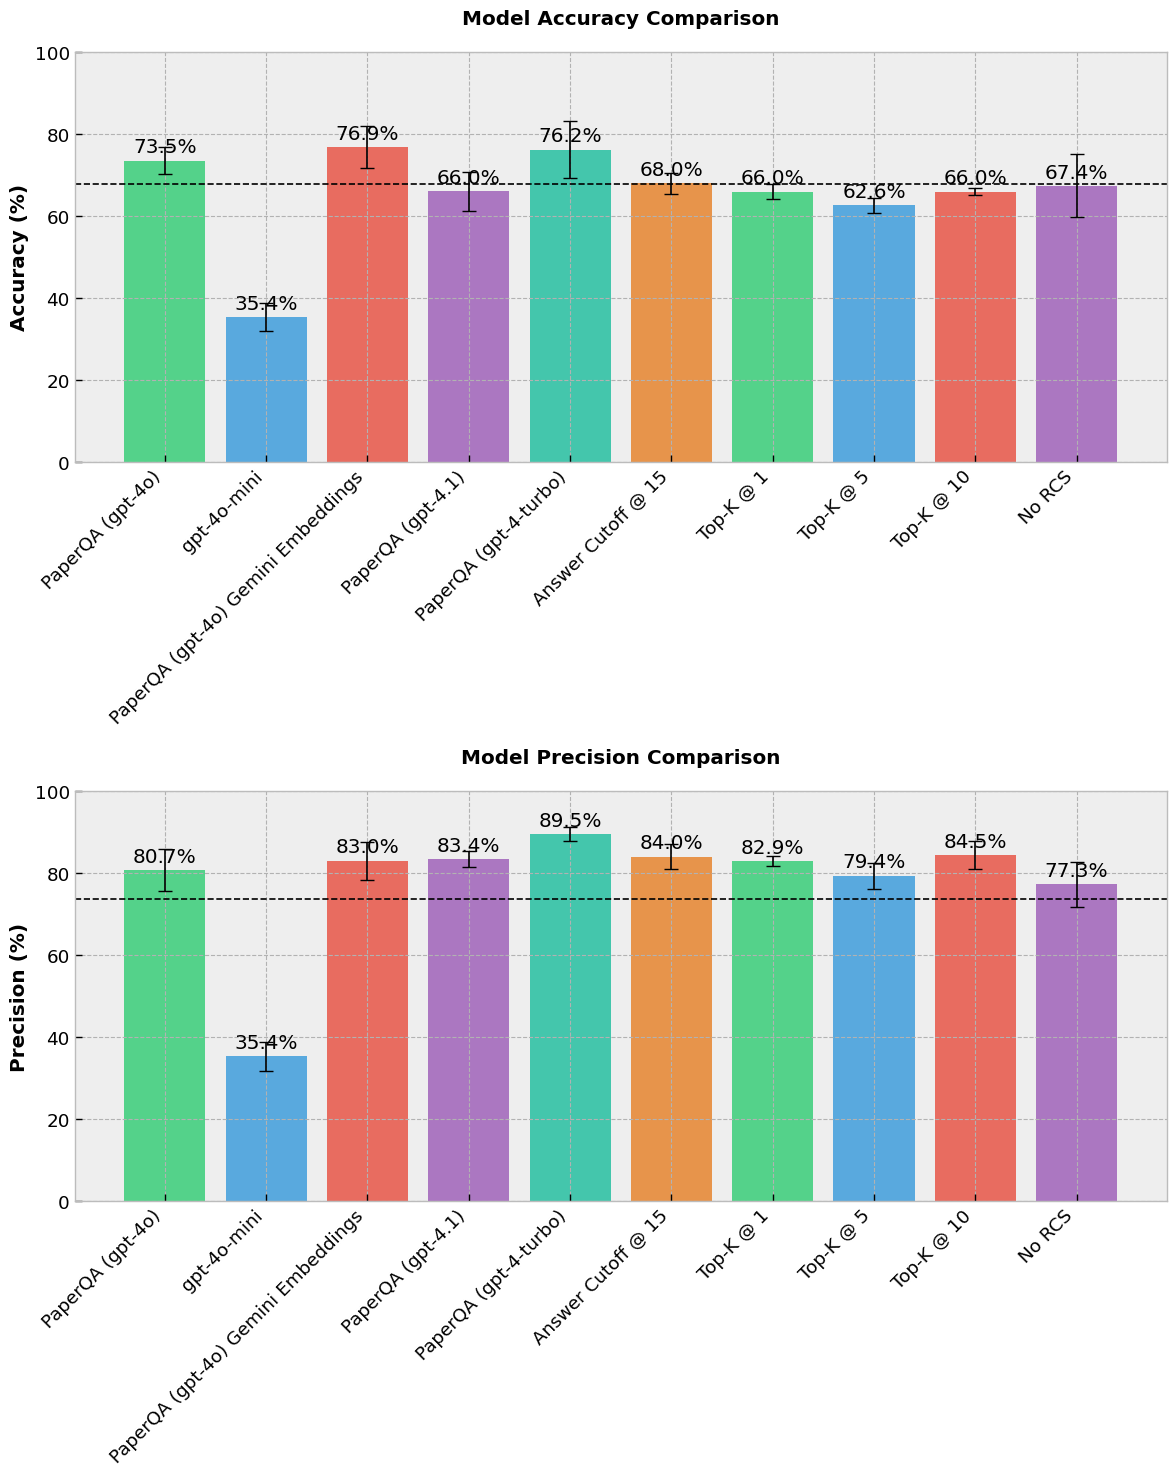

In [12]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15))

colors = ['#2ecc71', '#3498db', '#e74c3c', '#9b59b6', '#1abc9c', '#e67e22']

# Plot accuracy
acc_bars = ax1.bar(models, accuracy_means, yerr=accuracy_stds, capsize=5, color=colors,
                 alpha=0.8)
ax1.set_ylabel('Accuracy (%)', fontweight='bold')
ax1.set_title('Model Accuracy Comparison', fontweight='bold', pad=20)
ax1.axhline(67.7, linestyle="--", color="black")
ax1.set_ylim(0, 100)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# Plot precision
prec_bars = ax2.bar(models, precision_means, yerr=precision_stds, capsize=5, color=colors,
                     alpha=0.8)
ax2.set_ylabel('Precision (%)', fontweight='bold')
ax2.set_title('Model Precision Comparison', fontweight='bold', pad=20)
ax2.axhline(73.8, linestyle="--", color="black")
ax2.set_ylim(0, 100)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Add value labels on top of bars
def add_value_labels(ax, values):
    for i, v in enumerate(values):
        ax.text(i, v + 1, f'{v:.1f}%', ha='center', va='bottom')

add_value_labels(ax1, accuracy_means)
add_value_labels(ax2, precision_means)

# Adjust layout
plt.tight_layout()